# Modelling

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# File path
file_path = r'C:\Users\win\Desktop\PROJETO\dados\df_final.csv'

# Load the dataset
df_final = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_final.head()


,customer_unique_id,total_payment_value,cat_Alimentos e Bebidas,cat_Automotivo,cat_Casa e Construção,cat_Eletrodomésticos e Eletrônicos,cat_Indústria e Comércio,cat_Infantil,cat_Lazer e Entretenimento,cat_Moda e Acessórios,cat_Móveis e Decoração,cat_Outros,cat_Papelaria e Escritório,cat_Pet Shop,cat_Saúde e Beleza
0,0000366f3b9a7992bf8c76cfdf3221e2,0.159775,-0.1015,-0.205104,-0.366791,-0.466317,-0.066013,-0.274984,-0.329069,-0.320372,2.087344,-0.243453,-0.157021,-0.134238,-0.375200
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-1.623352,-0.1015,-0.205104,-0.366791,-0.466317,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,-0.157021,-0.134238,2.665244
2,0000f46a3911fa3c0805444483337064,-0.382587,-0.1015,-0.205104,-0.366791,-0.466317,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,6.368579,-0.134238,-0.375200
3,0000f6ccb0745a6a4b88665a16c9f078,-1.118885,-0.1015,-0.205104,-0.366791,2.144463,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,-0.157021,-0.134238,-0.375200
4,0004aac84e0df4da2b147fca70cf8255,0.517423,-0.1015,-0.205104,-0.366791,2.144463,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,-0.157021,-0.134238,-0.375200


# Elbow Method

C:\Users\win\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\win\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\win\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\win\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^

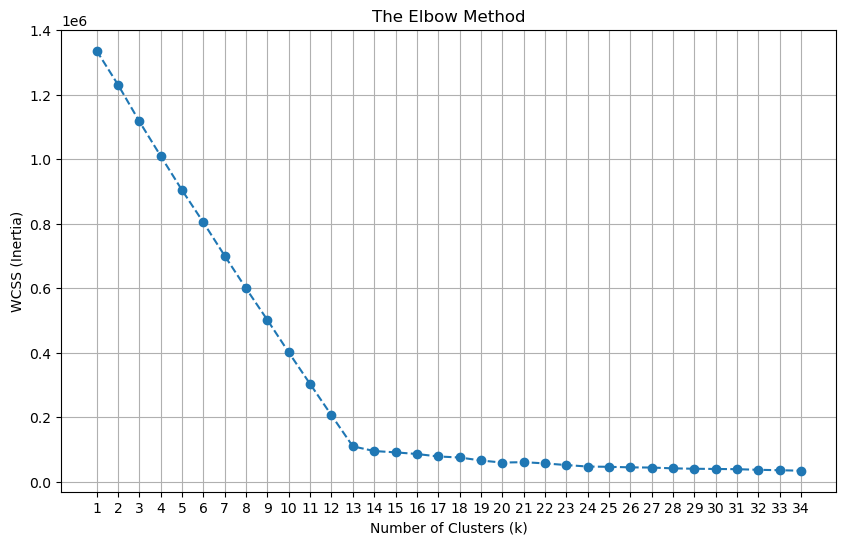

In [4]:
# 1. Prepare the data for clustering
data_for_clustering = df_final.drop('customer_unique_id', axis=1)

# 2. Calculate WCSS for a range of number of clusters
wcss = []
cluster_range = range(1, 35)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# 3. Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Defining clusters

In [5]:
# 1. Prepare the data for the final model
data_for_clustering = df_final.drop('customer_unique_id', axis=1)

# 2. Initialize and train the final K-Means model with k=4
final_kmeans_model = KMeans(n_clusters=23, n_init='auto', random_state=42)
cluster_labels = final_kmeans_model.fit_predict(data_for_clustering)

# 3. Add the final cluster labels back to your dataframe
df_final['cluster'] = cluster_labels
df_final.head()

,customer_unique_id,total_payment_value,cat_Alimentos e Bebidas,cat_Automotivo,cat_Casa e Construção,cat_Eletrodomésticos e Eletrônicos,cat_Indústria e Comércio,cat_Infantil,cat_Lazer e Entretenimento,cat_Moda e Acessórios,cat_Móveis e Decoração,cat_Outros,cat_Papelaria e Escritório,cat_Pet Shop,cat_Saúde e Beleza,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,0.159775,-0.1015,-0.205104,-0.366791,-0.466317,-0.066013,-0.274984,-0.329069,-0.320372,2.087344,-0.243453,-0.157021,-0.134238,-0.375200,19
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-1.623352,-0.1015,-0.205104,-0.366791,-0.466317,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,-0.157021,-0.134238,2.665244,5
2,0000f46a3911fa3c0805444483337064,-0.382587,-0.1015,-0.205104,-0.366791,-0.466317,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,6.368579,-0.134238,-0.375200,11
3,0000f6ccb0745a6a4b88665a16c9f078,-1.118885,-0.1015,-0.205104,-0.366791,2.144463,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,-0.157021,-0.134238,-0.375200,2
4,0004aac84e0df4da2b147fca70cf8255,0.517423,-0.1015,-0.205104,-0.366791,2.144463,-0.066013,-0.274984,-0.329069,-0.320372,-0.479078,-0.243453,-0.157021,-0.134238,-0.375200,12


In [6]:
# 1. Count the number of customers in each cluster
cluster_counts = df_final['cluster'].value_counts()

# 2. Calculate the percentage for each cluster
cluster_percentages = df_final['cluster'].value_counts(normalize=True) * 100

# 3. Combine the counts and percentages into a single summary DataFrame
df_summary = pd.DataFrame({
    'Customer Count': cluster_counts,
    'Percentage (%)': cluster_percentages
})

# Sort by cluster index for better readability
df_summary = df_summary.sort_index()

# Display the summary table
df_summary

,Customer Count,Percentage (%)
cluster,,
0,8724,9.142833
1,8026,8.411323
2,8255,8.651317
3,6007,6.295392
4,1828,1.915761
5,7347,7.699724
6,5307,5.561785
7,1688,1.769040
8,2538,2.659848


# Cluster analysis

In [7]:
# Define the file path
file_path = r'C:\Users\win\Desktop\PROJETO\dados\df_clean.csv'

# Load the .csv file into a pandas DataFrame called 'df'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data was loaded correctly
df.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,price,freight_value,product_category_name,macro_categoria
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,sp,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,credit_card,2,146.87,4,124.99,21.88,moveis_escritorio,Móveis e Decoração
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,sp,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,credit_card,8,335.48,5,289.00,46.48,utilidades_domesticas,Casa e Construção
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,sp,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,credit_card,7,157.73,5,139.94,17.79,moveis_escritorio,Móveis e Decoração
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,sp,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,credit_card,1,173.30,5,149.94,23.36,moveis_escritorio,Móveis e Decoração
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,sp,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,credit_card,8,252.25,5,230.00,22.25,casa_conforto,Móveis e Decoração


In [8]:
# Main aggregation
df_customer = df.groupby('customer_unique_id').agg(
    customer_city=('customer_city', 'first'),
    customer_state=('customer_state', 'first'),
    mean_payment_value=('payment_value', 'mean'),
    mean_price=('price', 'mean'),
    mean_freight_value=('freight_value', 'mean'),
    purchase_count=('order_id', 'count'),
    avg_payment_installments=('payment_installments', 'mean'),
    avg_review_score=('review_score', 'mean'),
    total_payment_sequential=('payment_sequential', 'sum'),
     dominant_macro_category=('macro_categoria', lambda x: x.mode()[0]),
    dominant_payment_type=('payment_type', lambda x: x.mode()[0])
).reset_index()

# Final cleaning 
df_customer['avg_payment_installments'] = df_customer['avg_payment_installments'].round()
df_customer['avg_review_score'] = df_customer['avg_review_score'].round(1)
df_customer['total_payment_sequential'] = df_customer['total_payment_sequential'].round(2)

df_customer.head()

,customer_unique_id,customer_city,customer_state,mean_payment_value,mean_price,mean_freight_value,purchase_count,avg_payment_installments,avg_review_score,total_payment_sequential,dominant_macro_category,dominant_payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,141.90,129.90,12.00,1,8.0,5.0,1,Móveis e Decoração,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,27.19,18.90,8.29,1,1.0,4.0,1,Saúde e Beleza,credit_card
2,0000f46a3911fa3c0805444483337064,sao jose,sc,86.22,69.00,17.22,1,8.0,3.0,1,Papelaria e Escritório,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,belem,pa,43.62,25.99,17.63,1,4.0,4.0,1,Eletrodomésticos e Eletrônicos,credit_card
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,sp,196.89,180.00,16.89,1,6.0,5.0,1,Eletrodomésticos e Eletrônicos,credit_card


In [9]:
# We only need the customer ID and the cluster label from df_final for this merge.
df_clusters = df_final[['customer_unique_id', 'cluster']]

# Merge df_customer with the cluster labels.
df_analysis = pd.merge(
    df_customer,
    df_clusters,
    on='customer_unique_id',
    how='inner'
)

# Display the first few rows to verify the merged DataFrame
df_analysis.head()

,customer_unique_id,customer_city,customer_state,mean_payment_value,mean_price,mean_freight_value,purchase_count,avg_payment_installments,avg_review_score,total_payment_sequential,dominant_macro_category,dominant_payment_type,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,sp,141.90,129.90,12.00,1,8.0,5.0,1,Móveis e Decoração,credit_card,19
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,sp,27.19,18.90,8.29,1,1.0,4.0,1,Saúde e Beleza,credit_card,5
2,0000f46a3911fa3c0805444483337064,sao jose,sc,86.22,69.00,17.22,1,8.0,3.0,1,Papelaria e Escritório,credit_card,11
3,0000f6ccb0745a6a4b88665a16c9f078,belem,pa,43.62,25.99,17.63,1,4.0,4.0,1,Eletrodomésticos e Eletrônicos,credit_card,2
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,sp,196.89,180.00,16.89,1,6.0,5.0,1,Eletrodomésticos e Eletrônicos,credit_card,12


# Insights
* Now with this step i have each measure i need to analyze for each cluster persona definition
* I also have my cluster column to investigate through the measures

# Cluster Analysis

In [10]:
# --- Region Mapping ---
state_to_region = {
    'sp': 'Southeast', 'rj': 'Southeast', 'es': 'Southeast', 'mg': 'Southeast',
    'pr': 'South', 'sc': 'South', 'rs': 'South',
    'ma': 'Northeast', 'pi': 'Northeast', 'ce': 'Northeast', 'rn': 'Northeast',
    'pb': 'Northeast', 'pe': 'Northeast', 'al': 'Northeast', 'se': 'Northeast', 'ba': 'Northeast',
    'ms': 'Center-West', 'mt': 'Center-West', 'go': 'Center-West', 'df': 'Center-West',
    'ro': 'North', 'ac': 'North', 'am': 'North', 'rr': 'North', 'pa': 'North', 'ap': 'North', 'to': 'North'
}
df_analysis['customer_region'] = df_analysis['customer_state'].map(state_to_region)


# --- Column Lists ---
numeric_cols = [
    'mean_payment_value', 'mean_price', 'mean_freight_value',
    'purchase_count', 'avg_payment_installments', 'avg_review_score',
    'total_payment_sequential'
]
categorical_cols = [
    'customer_region', 'dominant_macro_category'
]

# --- Basic Summaries ---
numeric_summary = df_analysis.groupby('cluster')[numeric_cols].mean().reset_index()

def mode_series(series):
    return series.mode().iloc[0] if not series.mode().empty else None

categorical_summary = df_analysis.groupby('cluster')[categorical_cols].agg(mode_series).reset_index()

# --- Customer Count per Cluster ---
cluster_counts = df_analysis['cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['cluster', 'customer_count']
total_customers = cluster_counts['customer_count'].sum()
cluster_counts['percentage'] = (cluster_counts['customer_count'] / total_customers * 100).round(2)

# --- Summary Functions ---
def get_payment_summary(df_with_payments):
    clusters = sorted(df_with_payments['cluster'].unique())
    results = []
    
    for cluster in clusters:
        subset = df_with_payments[df_with_payments['cluster'] == cluster]
        payment_counts = subset['payment_type'].value_counts(normalize=True) * 100
        
        if not payment_counts.empty:
            dominant_type = payment_counts.index[0]
            dominant_pct = payment_counts.iloc[0]
        else:
            dominant_type, dominant_pct = None, 0.0

        if len(payment_counts) > 1:
            second_dominant_type = payment_counts.index[1]
            second_dominant_pct = payment_counts.iloc[1]
        else:
            second_dominant_type, second_dominant_pct = None, 0.0
            
        results.append({
            'cluster': cluster,
            'dominant_payment_type': dominant_type,
            'dominant_payment_percentage': round(dominant_pct, 2),
            'second_dominant_payment_type': second_dominant_type,
            'second_dominant_payment_percentage': round(second_dominant_pct, 2)
        })
        
    return pd.DataFrame(results)

def get_region_summary(df):
    clusters = sorted(df['cluster'].unique())
    results = []
    for cluster in clusters:
        subset = df[df['cluster'] == cluster]
        region_counts = subset['customer_region'].value_counts(normalize=True) * 100
        if not region_counts.empty:
            dominant_region, dominant_pct = region_counts.index[0], region_counts.iloc[0]
        else:
            dominant_region, dominant_pct = None, 0.0
        if len(region_counts) > 1:
            second_region, second_pct = region_counts.index[1], region_counts.iloc[1]
        else:
            second_region, second_pct = None, 0.0
        results.append({
            'cluster': cluster, 'dominant_region': dominant_region,
            'dominant_region_percentage': round(dominant_pct, 2),
            'second_region': second_region, 'second_region_percentage': round(second_pct, 2)
        })
    return pd.DataFrame(results)

# --- Execution and Final Merge ---

# NEW STEP: Create a temporary DataFrame to link clusters with payment types
df_for_payment_analysis = df_analysis[['customer_unique_id', 'cluster']].merge(
    df[['customer_unique_id', 'payment_type']],
    on='customer_unique_id',
    how='left'
)

# Call the summary functions using the correct DataFrames
payment_summary = get_payment_summary(df_for_payment_analysis)
region_summary = get_region_summary(df_analysis)

# Merge all summaries
persona_summary = numeric_summary.merge(categorical_summary, on='cluster')
persona_summary = persona_summary.merge(cluster_counts, on='cluster')
persona_summary = persona_summary.merge(region_summary, on='cluster')
persona_summary = persona_summary.merge(payment_summary, on='cluster')

# View the final result
persona_summary

,cluster,mean_payment_value,mean_price,mean_freight_value,purchase_count,avg_payment_installments,avg_review_score,total_payment_sequential,customer_region,dominant_macro_category,customer_count,percentage,dominant_region,dominant_region_percentage,second_region,second_region_percentage,dominant_payment_type,dominant_payment_percentage,second_dominant_payment_type,second_dominant_payment_percentage
0,0,187.298162,165.836400,18.009653,1.174920,3.380903,4.102350,1.266965,Southeast,Moda e Acessórios,8724,9.14,Southeast,66.63,South,12.61,credit_card,75.98,boleto,16.98
1,1,71.549948,56.805693,16.049313,1.077000,2.555819,4.061201,1.256417,Southeast,Móveis e Decoração,8026,8.41,Southeast,76.24,South,13.63,credit_card,71.39,boleto,19.52
2,2,43.022520,28.997817,14.599534,1.038764,1.607632,4.119564,1.108177,Southeast,Eletrodomésticos e Eletrônicos,8255,8.65,Southeast,65.78,South,15.59,credit_card,69.12,boleto,24.07
3,3,79.737417,64.061443,16.382743,1.063925,1.938405,4.253954,1.115199,Southeast,Lazer e Entretenimento,6007,6.30,Southeast,70.00,South,14.32,credit_card,71.35,boleto,22.11
4,4,294.290018,243.938664,28.017510,1.347374,3.937637,4.015481,1.442013,Southeast,Automotivo,1828,1.92,Southeast,61.93,South,14.44,credit_card,78.08,boleto,16.32
5,5,77.020247,62.263524,15.317052,1.063427,2.357016,4.201102,1.123452,Southeast,Saúde e Beleza,7347,7.70,Southeast,70.56,South,12.14,credit_card,73.01,boleto,19.95
6,6,178.158476,151.572600,20.763523,1.212926,3.103825,4.081911,1.345393,Southeast,Outros,5307,5.56,Southeast,64.76,South,16.26,credit_card,73.82,boleto,18.63
7,7,146.483264,114.878293,20.733688,1.267180,2.715047,4.224408,1.336493,Southeast,Pet Shop,1688,1.77,Southeast,71.09,South,14.16,credit_card,74.85,boleto,18.47
8,8,275.370930,234.027881,28.139929,1.354610,3.978329,4.011426,1.438534,Southeast,Infantil,2538,2.66,Southeast,65.05,South,14.85,credit_card,78.80,boleto,15.79
9,9,89.487003,61.264256,15.234061,1.368962,1.973279,4.241110,1.420349,Southeast,Alimentos e Bebidas,973,1.02,Southeast,76.67,South,11.61,credit_card,73.87,boleto,20.05


# Persona Analysis

# Appliances & Electronics

## (Eletrodomésticos e Eletrônicos Baixo Orçamento) Appliances & Electronics Low Budget 
* 9% of total customers
* Avg Ticket 43 BRL
* Good review (4.1)
* 1.6 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (69%)
* Predominant in Southeast region (66%)
* Uses single payment method

----------------------------------------

## (Eletrodomésticos e Eletrônicos Médio Orçamento) Appliances & Electronics Mid Budget 
* 7% of total customers
* Avg Ticket 147 BRL
* Good review (4.0)
* 2.5 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (73%)
* Predominant in Southeast region (66%)
* Uses single payment method

----------------------------------------

## (Eletrodomésticos e Eletrônicos Premium) Appliances & Electronics Premium 
* 2% of total customers
* Avg Ticket 667 BRL
* Near good review (3.8)
* 4.6 avg installments
* 87% loyalty
* Pays mostly on credit card (69%)
* Predominant in Southeast region (62%)
* Uses multiple payment method

----------------------------------------
# Automotive

## (Automotivo Baixo Orçamento) Automotive Low Budget 
* 2% of total customers
* Avg Ticket 64 BRL
* Good review (4.1)
* 1.8 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (70%)
* Predominant in Southeast region (70%)
* Uses single payment method

----------------------------------------

## (Automotivo Premium) Automotive Premium 
* 2% of total customers
* Avg Ticket 294 BRL
* Good review (4.0)
* 3.9 avg installments
* 35% loyalty
* Pays mostly on credit card (78%)
* Predominant in Southeast region (62%)
* Uses single payment method

----------------------------------------
# Home & Construction

## (Casa E Construção Baixo Orçamento) Home & Construction Low Budget 
* 5% of total customers
* Avg Ticket 60 BRL
* Good review (4.2)
* 2.1 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (71%)
* Predominant in Southeast region (74%)
* Uses single payment method

----------------------------------------

## (Casa E Construção Médio Orçamento) Home & Construction Mid Budget 
* 5% of total customers
* Avg Ticket 159 BRL
* Good review (4.1)
* 3.5 avg installments
* 27% loyalty
* Pays mostly on credit card (75%)
* Predominant in Southeast region (70%)
* Uses single payment method

----------------------------------------

## (Casa E Construção Premium) Home & Construction Premium 
* 2% of total customers
* Avg Ticket 486 BRL
* Near good review (3.8)
* 4.7 avg installments
* Loyal customer
* Pays mostly on credit card (71%)
* Predominant in Southeast region (63%)
* Uses multiple payment method

----------------------------------------
# Kid's category

## (Infantil Baixo Orçamento) Kid's category Low Budget 
* 4% of total customers
* Avg Ticket 77 BRL
* Good review (4.2)
* 2.2 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (75%)
* Predominant in Southeast region (71%)
* Uses single payment method

----------------------------------------

## (Infantil Premium) Kid's category Premium 
* 3% of total customers
* Avg Ticket 275 BRL
* Good review (4.0)
* 4.0 avg installments
* 35% loyalty
* Pays mostly on credit card (79%)
* Predominant in Southeast region (65%)
* Uses single payment method

----------------------------------------
# Fashion & Accessories

## (Moda e Acessórios) Fashion & Accessories 
* 9% of total customers
* Avg Ticket 187 BRL
* Good review (4.1)
* 3.4 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (76%)
* Predominant in Southeast region (67%)
* Uses single payment method

----------------------------------------
# Food & Beverages

## (Alimentos e Bebidas) Food & Beverages
* 1% of total customers
* Avg Ticket 89 BRL
* Good review (4.2)
* 2.0 avg installments
* 37% loyalty
* Pays mostly on credit card (74%)
* Predominant in Southeast region (77%)
* Uses single payment method

----------------------------------------
# Furniture & Decoration

## (Móveis e Decoração Baixo Orçamento) Furniture & Decoration Low Budget 
* 8% of total customers
* Avg Ticket 72 BRL
* Good review (4.1)
* 2.6 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (71%)
* Predominant in Southeast region (76%)
* Uses single payment method

----------------------------------------

## (Móveis e Decoração Médio Orçamento) Furniture & Decoration Mid Budget 
* 7% of total customers
* Avg Ticket 169 BRL
* Near good review (4.0)
* 3.8 avg installments
* 28% loyalty
* Pays mostly on credit card (76%)
* Predominant in Southeast region (70%)
* Uses single payment method

----------------------------------------

## (Móveis e Decoração Premium) Furniture & Decoration Premium 
* 2% of total customers
* Avg Ticket 379 BRL
* Mid review (3.5)
* 4.8 avg installments
* Loyal customer
* Pays mostly on credit card (76%)
* Predominant in Southeast region (69%)
* Uses multiple payment method

----------------------------------------
# Health & Beauty

## (Saúde e Beleza Baixo Orçamento) Health & Beauty Low Budget 
* 8% of total customers
* Avg Ticket 77 BRL
* Good review (4.2)
* 2.4 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (73%)
* Predominant in Southeast region (71%)
* Uses single payment method

----------------------------------------

## (Saúde e Beleza Premium) Health & Beauty Premium
* 4% of total customers
* Avg Ticket 298 BRL
* Good review (4.1)
* 4.4 avg installments
* 35% loyalty
* Pays mostly on credit card (80%)
* Predominant in Southeast region (63%)
* Uses single payment method

----------------------------------------
# Industry & Commerce

## (Indústria e Comércio) Industry & Commerce
* 0.4% of total customers
* Avg Ticket 303 BRL
* Good review (4.1)
* 3.0 avg installments
* 34% loyalty
* Pays mostly on credit card (66%)
* Predominant in Southeast region (67%)
* Uses multiple payment method

----------------------------------------
# Leisure & Entertainment

## (Lazer e Entretenimento Baixo Orçamento) Leisure & Entertainment Low Budget 
* 6% of total customers
* Avg Ticket 80 BRL
* Good review (4.3)
* 1.9 avg installments
* Once in a lifetime customer
* Pays mostly on credit card (71%)
* Predominant in Southeast region (70%)
* Uses single payment method

----------------------------------------

## (Lazer e Entretenimento Premium) Leisure & Entertainment Premium 
* 3% of total customers
* Avg Ticket 300 BRL
* Good review (4.0)
* 3.6 avg installments
* 51% loyalty
* Pays mostly on credit card (76%)
* Predominant in Southeast region (64%)
* Uses single payment method

----------------------------------------
# Others

## (Outros Médio Orçamento) Others 
* 6% of total customers
* Avg Ticket 178 BRL
* Good review (4.1)
* 3.1 avg installments
* 21% loyalty
* Pays mostly on credit card (74%)
* Predominant in Southeast region (65%)
* Uses single payment method

----------------------------------------
# Pet Shop

## (Pet Shop) Pet Shop 
* 2% of total customers
* Avg Ticket 146 BRL
* Good review (4.2)
* 2.7 avg installments
* 27% loyalty
* Pays mostly on credit card (75%)
* Predominant in Southeast region (71%)
* Uses single payment method

----------------------------------------
# Stationery & Office

## (Papelaria e Escritório) Stationery & Office 
* 2% of total customers
* Avg Ticket 121 BRL
* Good review (4.2)
* 2.7 avg installments
* 21% loyalty
* Pays mostly on credit card (75%)
* Predominant in Southeast region (68%)
* Uses single payment method

----------------------------------------